# Acquire and Prepare - Wrangle

What is it?
- this is the step where we acquire and prepare our data in the data science pipeline
- combining these two steps together are oftening referred to as wrangling

Why do we care?
- this sets us for success in exploration and modeling! 

How is regression wrangle different than classification wrangle?
- its not different! it is the same!


# This Example Pipeline Scenario

Scenario: I'm a university teacher, and I want to know when to worry about a student's progress. I want to be able to work with any students who are at high risk of failing the class, so that I can try to prevent that from happening. I have the grades of the three exams and the final grade from last semester's class. I'm hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

Goal: we are trying to predict a students final grade based on previous exam scores

In [1]:
#doing things with data modules
import pandas as pd
import numpy as np

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## Acquire

Goals:
- get data
- cache a local copy
- verify it all came in 
- look at it
- understand my data
    - want to know what which row representations
    - understand what each column means

In [2]:
# Read csv file into pandas DataFrame.
file = "https://gist.githubusercontent.com/ryanorsinger/\
14c8f919920e111f53c6d2c3a3af7e70/raw/07f6e8004fa171638d6d599cfbf0513f6f60b9e8/student_grades.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [5]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [6]:
df.shape

(104, 5)

In [7]:
df.dtypes

student_id       int64
exam1          float64
exam2            int64
exam3           object
final_grade      int64
dtype: object

In [8]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


Takeaways:
- all my exam scores have different datatypes
- my target variable is final grade
- each row is one student and their respective exam grades, as well as their final score

## Prepare

Goals:
- verify/correct datatypes
- handle your nulls
- encode your string values
- visualize our univariate variables
- end with my train/validate/test split

### datatypes

#### exam 3

In [9]:
df.dtypes

student_id       int64
exam1          float64
exam2            int64
exam3           object
final_grade      int64
dtype: object

In [10]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [11]:
df.exam3.value_counts()

96    16
78    16
75    15
95     8
87     8
86     8
85     8
94     8
79     8
70     8
       1
Name: exam3, dtype: int64

In [12]:
df [df.exam3 == ' ']

,student_id,exam1,exam2,exam3,final_grade
11,12,57.0,65,,65


options:
- removing it completely
- replacing it with zero
- replacing it with an average value of exam3 scores

decided:
- will drop this row since it is only one and its the quickest method

In [13]:
#looking at average
df [df.exam3 != ' '].exam3.astype(int).mean()

84.24271844660194

In [14]:
#replaced the blank with a null
df.exam3 = df.exam3.replace(' ', np.nan)

In [15]:
#verify it worked
df.exam3.value_counts(dropna=False)

96     16
78     16
75     15
95      8
87      8
86      8
85      8
94      8
79      8
70      8
NaN     1
Name: exam3, dtype: int64

In [16]:
df.dtypes

student_id       int64
exam1          float64
exam2            int64
exam3           object
final_grade      int64
dtype: object

In [17]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


### handle nulls

In [18]:
df.isnull().sum()

student_id     0
exam1          1
exam2          0
exam3          1
final_grade    0
dtype: int64

In [19]:
df [df.exam1.isnull()]

,student_id,exam1,exam2,exam3,final_grade
9,10,NaN,70,79,70


In [20]:
df.shape

(104, 5)

In [21]:
df.exam3.value_counts().sort_index()

70     8
75    15
78    16
79     8
85     8
86     8
87     8
94     8
95     8
96    16
Name: exam3, dtype: int64

In [22]:
#drop all my nulls in the df
#will default to dropping any row with a null in it
df = df.dropna()

In [23]:
df.shape

(102, 5)

In [24]:
df.isnull().sum()

student_id     0
exam1          0
exam2          0
exam3          0
final_grade    0
dtype: int64

In [25]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [26]:
df.exam1.value_counts()

70.0     16
100.0     8
98.0      8
85.0      8
83.0      8
93.0      8
79.0      8
92.0      8
73.0      8
58.0      8
62.0      7
57.0      7
Name: exam1, dtype: int64

### correct dtypes for real

In [27]:
df.dtypes

student_id       int64
exam1          float64
exam2            int64
exam3           object
final_grade      int64
dtype: object

In [28]:
df.exam1 = df.exam1.astype(int)
df.exam3 = df.exam3.astype(int)

In [29]:
df.dtypes

student_id     int64
exam1          int64
exam2          int64
exam3          int64
final_grade    int64
dtype: object

### visualize 

In [30]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [31]:
df.student_id.nunique()

102

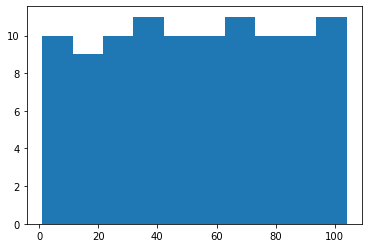

In [32]:
plt.hist(df.student_id)
plt.show()

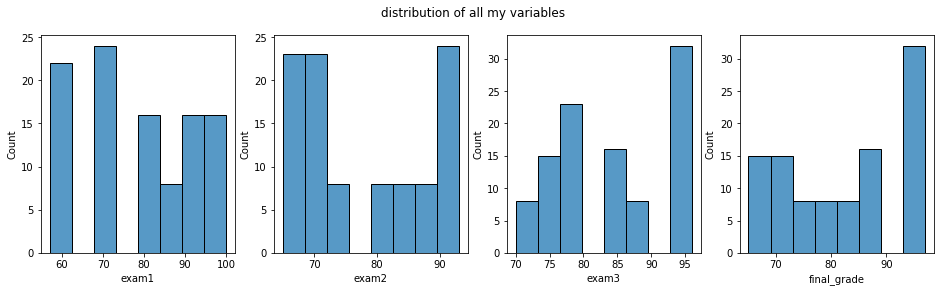

In [33]:
plt.figure(figsize=(16,4))

#enumerate gives us the index of what we are iterating over
# as well as the iteration of the df.columns
for i, col in enumerate(df.columns[1:]):
#     print(i, col)

    plt.subplot(1,4,i+1)
    sns.histplot(df[col])

plt.suptitle('distribution of all my variables')
plt.show()


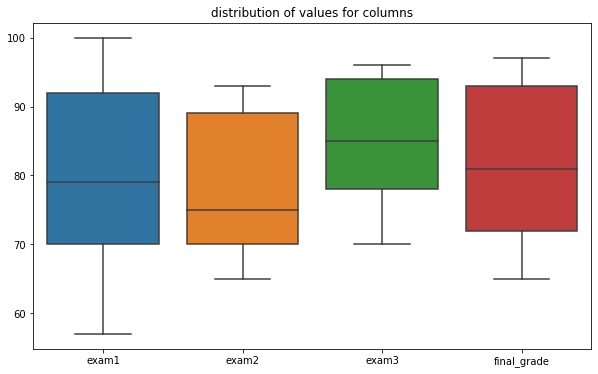

In [34]:
#another option for visualization
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop(columns='student_id'))
plt.title('distribution of values for columns')
plt.show()

Takeaways:
- dropped two rows because of null values
- changing all our datatypes to integers
- none of my columns are normally distributed 
- it looks like exam1 might be most closely related to final_grade

## Finish wrangle by making a function! 

In [35]:
def wrangle_exams():
    '''
    read csv from url into df, clean df, and return the prepared df
    '''
    # Read csv file into pandas DataFrame.
    file = "https://gist.githubusercontent.com/ryanorsinger/\
14c8f919920e111f53c6d2c3a3af7e70/raw/07f6e8004fa171638d6d599cfbf0513f6f60b9e8/student_grades.csv"
    df = pd.read_csv(file)

    #replace blank space with null value
    df.exam3 = df.exam3.replace(' ', np.nan)
    
    #drop all nulls
    df = df.dropna()
    
    #change datatype to exam1 and exam3 to integers
    df.exam1 = df.exam1.astype(int)    
    df.exam3 = df.exam3.astype(int)

    return df

In [36]:
#test it works
fresh_df = wrangle_exams()

In [37]:
fresh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


# We train/validate/test split BEFORE explore

However, we're gonna talk about scaling on monday, which we will do before our train/validate/test split